In [1]:
# -*- coding: utf-8 -*-
"""
Hubbard parameters for triangular optical lattice
"""
import numpy as np
lam = 1 # Normalized wavelength
d = lam/2 # lattice constant
k = 2*np.pi/lam # wave number
k1 = k*np.array([0,-1]) # reciprocal lattice vector 1
k2 = k*np.array([np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 2
k3 = k*np.array([-np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 3

v12 = 3 # Depth of Diagonal lattice created by lattice beam 1 and 2
v23 = 3 # 
v31 = 3

phi12 = 0 # lattice phase 1
phi23 = 0 # lattice phase 2

n = 10 # include (2n+1)^2 plane waves in calculation <=> calculate over (2n+1)^2 bands
m = 8 # calculate over (2m(+1))^2 quasimomenta

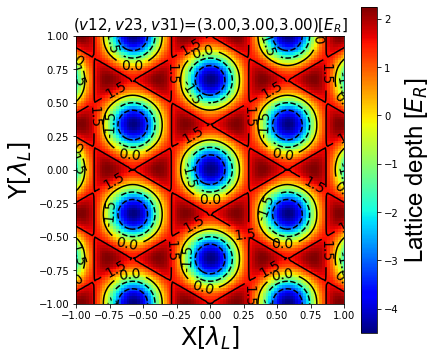

In [2]:
"Potential landscape"

b1 = k2-k3
b2 = k3-k1
b3 = k1-k2

x = np.arange(-1.2,1.2,0.02)
y = np.arange(-1.2,1.2,0.02)
X,Y = np.meshgrid(x,y)
Z = list(map(lambda x,y: -v12/2*np.cos(np.inner(b1,np.array([x,y]).T))-v23/2*np.cos(np.inner(b2,np.array([x,y]).T)+phi12)-v31/2*np.cos(np.inner(b1+b2,np.array([x,y]).T)+phi23), X,Y))

import matplotlib.pyplot as plt
plt.figure(figsize=[6,6])
cont=plt.contour(X,Y,Z,  5, vmax=1,colors=['black'])
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.xlabel(r'X[$\lambda_L$]', fontsize=24)
plt.ylabel(r'Y[$\lambda_L$]', fontsize=24)
plt.title(r'$(v12,v23,v31)$=({:.2f},{:.2f},{:.2f})[$E_R$]'.format(v12,v23,v31), fontsize=15)

plt.pcolormesh(X,Y,Z, cmap='jet') #カラー等高線図
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
pp.set_label("Lattice depth [$E_R$]", fontname="Arial", fontsize=24) #カラーバーのラベル

In [3]:

"Hamiltonian"

#Quasimomentum list
dn = 20
# nq_list = [(x,0) for x in np.linspace(0,1/2,int(dn*np.sqrt(3)))] #Gamma => M
# n_M = len(nq_list) - 0.5
# nq_list = nq_list + [(1/2 - x/6, -x/3) for x in np.linspace(0, 1, dn) if x>0] # M -> K
# n_K = len(nq_list) - 0.5
# nq_list = nq_list + [(1/3 + x/6, -1/3 - x/6) for x in np.linspace(0,1,dn) if x>0] #K -> X
# n_X = len(nq_list) - 0.5
# nq_list = nq_list + [(x/2, -x/2) for x in np.linspace(1, 0, int(dn*np.sqrt(3))) if x<1] # M -> Gamma
# n_Gamma = len(nq_list)

nq_list = [(x/2,0) for x in np.linspace(0,1,int(dn*np.sqrt(3)))] #Gamma => M
n_M = len(nq_list) - 0.5
nq_list = nq_list + [(1/2 + x/6, x/3) for x in np.linspace(0, 1, dn)] # M -> K
n_K = len(nq_list) - 0.5
nq_list = nq_list + [(2/3 - x/6, 1/3 + x/6) for x in np.linspace(0,1,dn)] #K -> X
n_X = len(nq_list) - 0.5
nq_list = nq_list + [(x/2, x/2) for x in np.linspace(1, 0, int(dn*np.sqrt(3)))] # M -> Gamma
n_Gamma = len(nq_list)

Nsite=2*n+1
l_list = [(x, y) for x in np.linspace(-n, n, Nsite, dtype=np.int) for y in np.linspace(-n, n, Nsite, dtype=np.int)]
E = np.zeros([len(nq_list), Nsite**2])
C = np.zeros([Nsite**2, len(nq_list), Nsite**2])
H_tmp = np.zeros([Nsite**2, Nsite**2])

l_list_1 = np.array(l_list)[:, 0]
l_list_2 = np.array(l_list)[:, 1]
l2, l1 = np.meshgrid(l_list_1, l_list_1)
m2, m1 = np.meshgrid(l_list_2, l_list_2)

l_diffs_1 = l1 - l2
l_diffs_2 = m1 - m2
l_diffs = l_diffs_1 * l_diffs_2
condition_1 = (np.abs(l_diffs_1) == 1) * (m1 == m2)
condition_2 = (l1 == l2) * (np.abs(l_diffs_2) == 1)
condition_3 = (l_diffs == 1)

H_tmp[condition_1 == 1] = -v12/4
H_tmp[condition_2 == 1] += -v23/4
H_tmp[condition_3 == 1] += -v31/4

for i_n, n in enumerate(nq_list):
    H = np.copy(H_tmp)
    K = 3 * ((n[0] - l1)**2 + (n[1] - m1)**2 - (n[0] - l2) * (n[1] - m2))
    H += ((l1 == l2) * (m1 == m2)) * K
    E0, P = np.linalg.eig(H)
    rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
    E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
    C[:, i_n, :] = np.array(tmp)

<ipython-input-3-040edec012e8>:51: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
<ipython-input-3-040edec012e8>:52: ComplexWarning: Casting complex values to real discards the imaginary part
  C[:, i_n, :] = np.array(tmp)


Text(0.5, 1.0, '$(v12,v23,v31)$=(3.00,3.00,3.00)[$E_R$]')

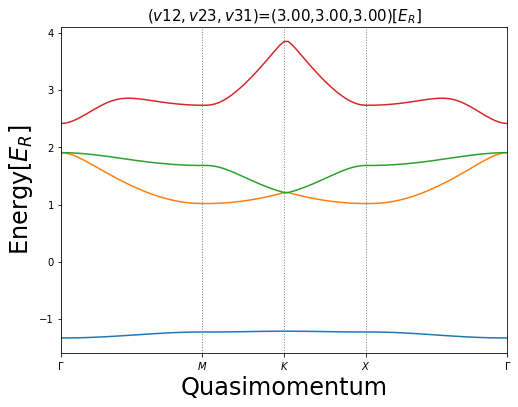

In [4]:

"Plot Band structure"

M_point = 1/2
K_point = 1/2+1/(2*np.sqrt(3))
X_point = 1/2+1/(np.sqrt(3))
Gamma_point = 1+1/np.sqrt(3)
nq_list_1d = np.linspace(0,M_point-M_point/(int(n_M)), int(n_M))
nq_list_1d = np.append(nq_list_1d, np.linspace(M_point, K_point-(K_point-M_point)/(int(n_K-n_M)),int(n_K-n_M)))
nq_list_1d = np.append(nq_list_1d, np.linspace(K_point, X_point-(X_point-K_point)/(int(n_X-n_K)), int(n_X-n_K)))
nq_list_1d = np.append(nq_list_1d, np.linspace(X_point, Gamma_point, int(n_Gamma-n_X+1)))
# nq_list_1d = np.linspace(0,M_point-M_point/dn, int(n_M))
# nq_list_1d = np.append(nq_list_1d, np.linspace(M_point, K_point-K_point/dn,int(n_K-n_M)))
# nq_list_1d = np.append(nq_list_1d, np.linspace(K_point, X_point-X_point/dn, int(n_X-n_K)))
# nq_list_1d = np.append(nq_list_1d, np.linspace(X_point, Gamma_point, int(n_Gamma-n_X+1)))

plt.figure(figsize=[8,6])
plt.plot(nq_list_1d,E[:,0])
plt.plot(nq_list_1d,E[:,1])
plt.plot(nq_list_1d,E[:,2])
plt.plot(nq_list_1d,E[:,3])
plt.xlim(0,1/+2+np.sqrt(3)/2)
# plt.ylim(-1,1)
plt.xlabel('Quasimomentum', fontsize=24)
plt.ylabel('Energy[$E_R$]', fontsize=24)
plt.xticks([0,M_point,K_point,X_point, Gamma_point],[r"$\Gamma$",r"$M$", r"$K$",r"$X$", r"$\Gamma$"])
for x in [0,M_point,K_point,X_point,Gamma_point]:
    plt.axvline(x,c='gray',ls=':',lw=1)
plt.title(r'$(v12,v23,v31)$=({:.2f},{:.2f},{:.2f})[$E_R$]'.format(v12,v23,v31), fontsize=15)

In [5]:
"Calculate Bloch Function"

band = 0 # band index
quasi = 0 # 0=>Gamma, n_M => M, n_K => K
H = np.copy(H_tmp)
K = 3 * ((n[0] - l1)**2 + (n[1] - m1)**2 - (n[0] - l2) * (n[1] - m2))
H += ((l1 == l2) * (m1 == m2)) * K
E0, P = np.linalg.eig(H)
x = np.arange(-1.2,1.2,0.02)
y = np.arange(-1.2,1.2,0.02)
X,Y = np.meshgrid(x,y)
# Z= blochstate(X,Y)
Z = list(map(lambda x,y: np.abs(np.sum(list(map(lambda l1: np.sum(list(map(lambda l2: P[Nsite*l1+l2,np.argmin(E0)]*np.exp(2*np.pi*1.j*((l1-(Nsite-1)/2)*np.sqrt(3)*x-(l2-(Nsite-1)/2)*(np.sqrt(3)/2*x+3/2*y))),range(Nsite))), axis=0), range(Nsite))), axis=0))**2, X,Y))

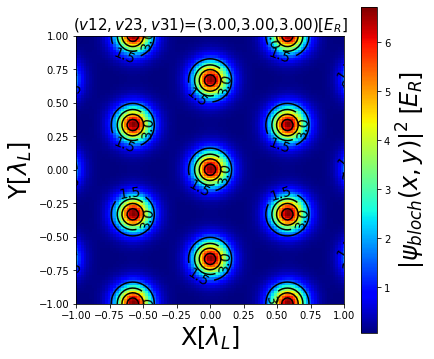

In [6]:
"Plot Bloch function"

plt.figure(figsize=[6,6])
cont=plt.contour(X,Y,Z,  5, vmax=1,colors=['black'])
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.xlabel(r'X[$\lambda_L$]', fontsize=24)
plt.ylabel(r'Y[$\lambda_L$]', fontsize=24)
plt.title(r'$(v12,v23,v31)$=({:.2f},{:.2f},{:.2f})[$E_R$]'.format(v12,v23,v31), fontsize=15)

plt.pcolormesh(X,Y,Z, cmap='jet') #カラー等高線図
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
pp.set_label(r"$|\psi_{bloch}(x,y)|^2$ [$E_R$]", fontname="Arial", fontsize=24) #カラーバーのラベル

In [7]:

"Progressive phase update of Bloch function prior to constructing Wannier Function"

qx = np.linspace(-1/2,1/2,2*m+1)
qy = np.linspace(-1/2,1/2,2*m+1)
QX,QY = np.meshgrid(qx,qy)

C0 = np.zeros([(2*m+1)**2, Nsite**2])
E1st = np.zeros((2*m+1)**2)

for i in range(2*m+1):
    for j in range(2*m+1):
        H = np.copy(H_tmp)    
        K = 3 * ((QX[i,j] - l1)**2 + (QY[i,j] - m1)**2 - (QX[i,j] - l2) * (QY[i,j] - m2))
        H += ((l1 == l2) * (m1 == m2)) * K
        E0, P = np.linalg.eig(H)
        C0[i*(2*m+1)+j, :] = P[:,np.argmin(E0)]
        E1st[i*(2*m+1)+j] = np.min(E0)
        if j>0 :
                norm1=np.linalg.norm(C0[i*(2*m+1)+j,:]+C0[i*(2*m+1)+j-1,:])
                norm2=np.linalg.norm(C0[i*(2*m+1)+j,:]-C0[i*(2*m+1)+j-1,:])
                if norm2 > norm1 :
                    C0[i*(2*m+1)+j, :] = - C0[i*(2*m+1)+j, :]
        if j==0 :
            if i > 0:
                norm1=np.linalg.norm(C0[i*(2*m+1)+j,:]+C0[(i-1)*(2*m+1)+j,:])
                norm2=np.linalg.norm(C0[i*(2*m+1)+j,:]-C0[(i-1)*(2*m+1)+j,:])
                if norm2 > norm1 :
                    C0[i*(2*m+1)+j, :] = - C0[i*(2*m+1)+j, :]

<ipython-input-7-89aafcd4dfaa>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  C0[i*(2*m+1)+j, :] = P[:,np.argmin(E0)]
<ipython-input-7-89aafcd4dfaa>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  E1st[i*(2*m+1)+j] = np.min(E0)


In [8]:
norm_list = np.zeros([2*m+1, 2*m+1])
norm_list2 = np.zeros([2*m+1, 2*m+1])
for i in range(2*m+1):
    for j in range(2*m+1):
        if j>0 :
            norm_list[i,j] = norm1=np.linalg.norm(C0[i*(2*m+1)+j,:]-C0[i*(2*m+1)+j-1,:])
            norm_list2[i,j] = norm1=np.linalg.norm(C0[i*(2*m+1)+j,:]+C0[i*(2*m+1)+j-1,:])
        elif j==0 :
            if i>0 :
                norm_list[i,j] = np.linalg.norm(C0[i*(2*m+1)+j,:]-C0[(i-1)*(2*m+1)+j,:])
                norm_list2[i,j] = norm1=np.linalg.norm(C0[i*(2*m+1)+j,:]+C0[(i-1)*(2*m+1)+j,:])

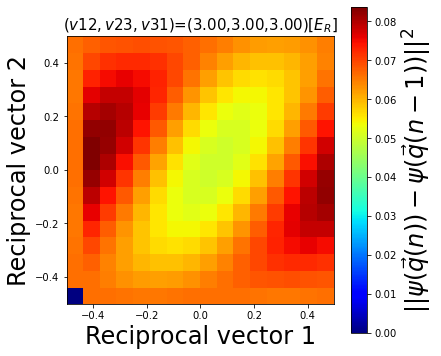

In [9]:
"Check phase of Bloch function"

plt.figure(figsize=[6,6])
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.gca().set_aspect('equal')
plt.xlabel(r'Reciprocal vector 1', fontsize=24)
plt.ylabel(r'Reciprocal vector 2', fontsize=24)
plt.title(r'$(v12,v23,v31)$=({:.2f},{:.2f},{:.2f})[$E_R$]'.format(v12,v23,v31), fontsize=15)

plt.pcolormesh(QX,QY,norm_list, cmap='jet') #カラー等高線図
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
pp.set_label(r"$|| \psi(\vec{q}(n)) - \psi(\vec{q}(n-1)) ||^2$", fontname="Arial", fontsize=24) #カラーバーのラベル

In [10]:
"Construct Wannier function"


site = np.array([0,0])
grid = 0.06
x = np.arange(-1,1,grid)
y = np.arange(-1,1,grid)
X,Y = np.meshgrid(x,y)
C0_list=list(C0[n1*(2*m+1)+n2,Nsite*l1+l2]*np.exp(-2*np.pi*1.j*((n1/m-1)*(np.sqrt(3)/2*site[0]-3/2*site[1])-1/2*(n2/m-1)*(np.sqrt(3)/2*site[0]+3/2*site[1]))) for n1 in range(2*m) for n2 in range(2*m) for l1 in range(Nsite) for l2 in range(Nsite))
C0_list=np.reshape(C0_list, (2*m, 2*m, Nsite, Nsite))

import time
t1 = time.time()
wannier_list = list(map(lambda x,y: np.sum(list(map(lambda n1: np.sum(list(map(lambda n2: np.sum(list(map(lambda l1: np.sum(list(map(lambda l2:  3/(np.sqrt(2)*3**(1/4))/((2*m)**2)*C0_list[n1,n2,l1,l2]*np.exp(2*np.pi*1.j*(((n1/m-1)/2+l1-(Nsite-1)/2)*(np.sqrt(3)/2*x-3/2*y)+((n2/m-1)/2+l2-(Nsite-1)/2)*(np.sqrt(3)/2*x+3/2*y))),range(Nsite))),axis=0), range(Nsite))), axis=0), range(2*m))),axis=0), range(2*m))),axis=0), X,Y))
t2 = time.time()
print('Elapsed time ={:.2f}[s]'.format(t2-t1))

Elapsed time =70.09[s]


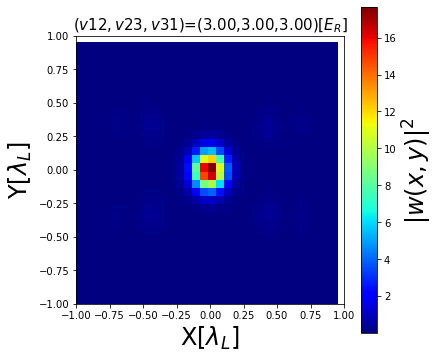

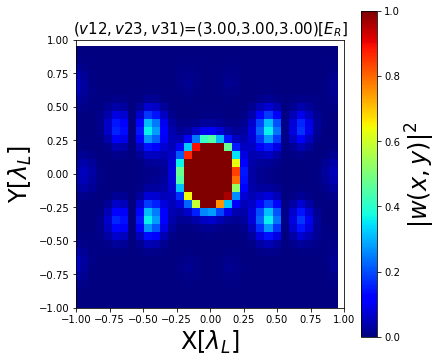

In [11]:
"Plot Wannier Function"

shifted_x = np.arange(-1-grid/2, 1-grid/2, grid)
shifted_y = np.arange(-1-grid/2, 1-grid/2, grid)
shifted_X, shifted_Y = np.meshgrid(shifted_x, shifted_y)
plt.figure(figsize=[6,6])
"""
# cont=plt.contour(X,Y,np.abs(wannier_list)**2,  5, Vmax=1,colors=['black'])
# cont.clabel(fmt='%1.1f', fontsize=14)
"""
plt.pcolormesh(shifted_X,shifted_Y,np.abs(wannier_list)**2, cmap='jet') #カラー等高線図
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.xlabel(r'X[$\lambda_L$]', fontsize=24)
plt.ylabel(r'Y[$\lambda_L$]', fontsize=24)
plt.title(r'$(v12,v23,v31)$=({:.2f},{:.2f},{:.2f})[$E_R$]'.format(v12,v23,v31), fontsize=15)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
pp.set_label("$|w(x,y)|^2$", fontname="Arial", fontsize=24) #カラーバーのラベル

plt.figure(figsize=[6,6])
plt.pcolormesh(shifted_X,shifted_Y,np.abs(wannier_list)**2, cmap='jet',vmin=0,vmax=1) #カラー等高線図
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.xlabel(r'X[$\lambda_L$]', fontsize=24)
plt.ylabel(r'Y[$\lambda_L$]', fontsize=24)
plt.title(r'$(v12,v23,v31)$=({:.2f},{:.2f},{:.2f})[$E_R$]'.format(v12,v23,v31), fontsize=15)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
pp.set_label("$|w(x,y)|^2$", fontname="Arial", fontsize=24) #カラーバーのラベル

In [12]:
normcheck=np.sum(np.abs(wannier_list)**2)*grid**2
w4tri=np.sum(np.abs(wannier_list)**4*grid**2)/(normcheck**2)
print(normcheck)
print("¥int |w|^4 dxdy = {:.3f}".format(w4tri))

0.9547466695179367
¥int |w|^4 dxdy = 8.573


In [13]:
"Tunneling matrix element"

a_s = 5.3*10**(-9) #s-wave scattering length of 87Rb atom [m]
lambda_L = 1064*10**(-9) #wave lenght of triangular lattice beam [m] 
h_bar = 1.054571596*10**(-34) #Converted Plank const
mrb = 87*1.66053873*10**(-27) #Single atom mass of 174Yb
er = h_bar**2/(2*mrb)*(2*np.pi/lambda_L)**2 #Recoil energy of 1064nm lattice

dxij = np.array([0,-2/3])
tunneling = - np.real(np.sum(list(map(lambda l1:np.sum(list(map(lambda l2: 1/(2*m)**2*np.exp(1.j*2*np.pi*(1/2*(l1/m-1)*np.sqrt(3)*dxij[0] - 1/2*(l2/m-1)*(np.sqrt(3)/2*dxij[0]+3/2*dxij[1])))*E1st[l1*(2*m+1)+l2] ,range(2*m))),axis=0),range(2*m)))))
dxij = np.array([np.sqrt(3)/3,1/3])
tunneling2 = - np.real(np.sum(list(map(lambda l1:np.sum(list(map(lambda l2: 1/(2*m)**2*np.exp(1.j*2*np.pi*(1/2*(l1/m-1)*np.sqrt(3)*dxij[0] - 1/2*(l2/m-1)*(np.sqrt(3)/2*dxij[0]+3/2*dxij[1])))*E1st[l1*(2*m+1)+l2] ,range(2*m))),axis=0),range(2*m)))))
dxij = np.array([-np.sqrt(3)/3,1/3])
tunneling3 = - np.real(np.sum(list(map(lambda l1:np.sum(list(map(lambda l2: 1/(2*m)**2*np.exp(1.j*2*np.pi*(1/2*(l1/m-1)*np.sqrt(3)*dxij[0] - 1/2*(l2/m-1)*(np.sqrt(3)/2*dxij[0]+3/2*dxij[1])))*E1st[l1*(2*m+1)+l2] ,range(2*m))),axis=0),range(2*m)))))
print("tunneling_1/h = {:.2f}[Hz]".format(tunneling*er/(2*np.pi*h_bar)))
print("tunneling_2/h = {:.2f}[Hz]".format(tunneling2*er/(2*np.pi*h_bar)))
print("tunneling_3/h = {:.2f}[Hz]".format(tunneling3*er/(2*np.pi*h_bar)))


tunneling_1/h = 26.98[Hz]
tunneling_2/h = 26.98[Hz]
tunneling_3/h = 26.98[Hz]


In [14]:
"""
Vertical lattice
"""

n = 15
m = 20
s = 1000 #potential depth [ER]

In [15]:
"Hamiltonian"

Nsite = 2*n+1
H = np.zeros([Nsite, Nsite])

q = np.linspace(-1, 1,2*m+1)
E = np.zeros([q.size, Nsite])
tmp = np.eye(Nsite-1)
Htmp = np.zeros([Nsite, Nsite])
Htmp[0:Nsite-1, 1:Nsite] += -s/4 * tmp
Htmp[1:Nsite, 0:Nsite-1] += -s/4 * tmp

C = np.zeros([Nsite, q.size, Nsite])
C0 = np.zeros([Nsite,q.size])
for i_q in range(q.size):
        H = np.copy(Htmp)
        for i in range(Nsite):
            H[i][i] = (2*(i-(Nsite-1)/2) + q[i_q])**2 + s/2
        
        E0, P = np.linalg.eig(H)
        C0[:,i_q] = P[:,np.argmin(E0)]
        rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
        
        E[i_q, :], P = map(list, zip(*rearrangedEvalsVecs))
        C[:, i_q, :] = np.array(P)
Energy = E.T


Text(0.5, 1.0, '$s$=1000.00[$E_R$]')

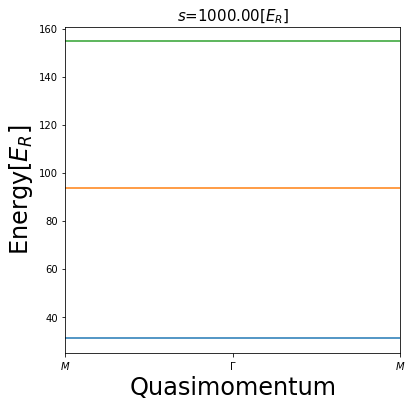

In [16]:
"Plot Band structure"

plt.figure(figsize=[6,6])
list(map(lambda x: plt.plot(q,E[:,x]), range(3)))
plt.xlim(-1,1)
plt.xlabel('Quasimomentum', fontsize=24)
plt.ylabel('Energy[$E_R$]', fontsize=24)
plt.xticks([-1,0,1],[r"$M$",r"$\Gamma$", r"$M$"])
plt.title(r'$s$={:.2f}[$E_R$]'.format(s), fontsize=15)
# %%

In [17]:
"Tunneling matrix element"

lambda_v = 810*10**(-9) #wavelength for vertical lattice [m]
angle = 10 #incident angle from horizontal surface [degree]
theta = angle*np.pi/180
d_v = lambda_v / (2*np.sin(theta)) #lattice constant of vertical lattice [m]
er_v = h_bar**2*np.pi**2/(2*mrb*d_v**2) #Recoil energy of vertical lattice

tunneling_v = -np.real(np.sum(list(map(lambda x: np.sum(1/(2*m)*np.exp(1.j*np.pi*q[x])*E[x,0],axis=0),range(2*m)))))
print("tunneling along vertical direction / h = {:f}[Hz]".format(tunneling_v))

tunneling along vertical direction / h = 0.000000[Hz]


In [18]:
"Progressive phase update of Bloch function prior to constructing Wannier function"

for x in range(2*m):
    norm1 = np.linalg.norm(C0[:,x+1]+C0[:,x])
    norm2 = np.linalg.norm(C0[:,x+1]-C0[:,x])
    if norm2 > norm1:
        C0[:,x+1] = -C0[:,x+1]
norm1_list = list(map(lambda x: np.linalg.norm(C0[:,x+1]-C0[:,x]), range(2*m)))
norm2_list = list(map(lambda x: np.linalg.norm(C0[:,x+1]+C0[:,x]), range(2*m)))

Text(0.5, 1.0, '$s$=1000.00[$E_R$]')

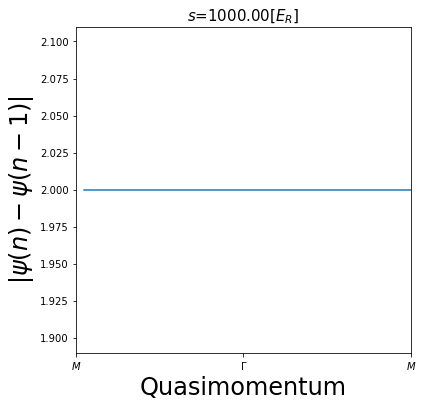

In [19]:
"Check phase of Bloch function"

plt.figure(figsize=[6,6])
plt.plot(q[1:2*m+1],norm2_list)
plt.xlim(-1,1)
plt.xlabel('Quasimomentum', fontsize=24)
plt.ylabel(r'|$\psi(n) - \psi(n-1)$|', fontsize=24)
plt.xticks([-1,0,1],[r"$M$",r"$\Gamma$", r"$M$"])
plt.title(r'$s$={:.2f}[$E_R$]'.format(s), fontsize=15)

In [20]:
"Construct Wannier function"

grid_v = 0.01
x_v = np.arange(-1,1,grid_v)
pos = 0
wannier_v_list = list(map(lambda i: np.sum(list(map(lambda n1: np.sum(list(map(lambda l1: 1/(2*m)*np.exp(-1.j*np.pi*q[n1]*pos)*C0[l1,n1]*np.exp(1.j*np.pi*(q[n1]+2*(l1-(Nsite-1)/2))*i),range(Nsite))),axis=0),range(2*m))),axis=0),x_v))

Text(0.5, 1.0, '$s$=1000.00[$E_R$],Band=0')

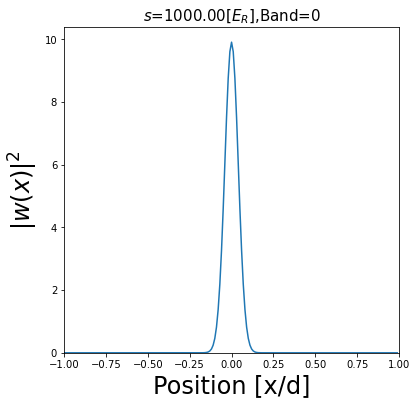

In [21]:
"Plot Wannier function"

plt.figure(figsize=[6,6])
plt.plot(x_v,np.abs(wannier_v_list)**2)
plt.xlim(-1,1)
plt.ylim(0,)
plt.xlabel('Position [x/d]', fontsize=24)
plt.ylabel('$|w(x)|^2$', fontsize=24)
plt.title(r'$s$={:.2f}[$E_R$],Band={:d}'.format(s,band), fontsize=15)

In [22]:
normcheck_v = np.sum(np.abs(wannier_v_list)**2)*grid_v
wannier4_v = np.sum(np.abs(wannier_v_list)**4)*grid_v / normcheck_v
print(normcheck_v)
print(wannier4_v)

0.9999999999999943
6.998356583581668


In [23]:
"Summary"

U = 4*np.pi*h_bar**2*a_s/mrb *1/lambda_L**2*w4tri*1/d_v*wannier4_v
print("On-site interaction U/h = {:f} [Hz]".format(U/(2*np.pi*h_bar)))
print("Nearest neighbor tunneling on triangular lattice 1 t_1/h = {:f}[Hz]".format(tunneling*er/(2*np.pi*h_bar)))
print("Nearest neighbor tunneling on triangular lattice 2 t_2/h = {:f}[Hz]".format(tunneling2*er/(2*np.pi*h_bar)))
print("Nearest neighbor tunneling on triangular lattice 3 t_3/h = {:f}[Hz]".format(tunneling3*er/(2*np.pi*h_bar)))
print("U/(2t_1+2t_2+2t_3) = {:f}".format(U/(2*tunneling*er+2*tunneling2*er+2*tunneling3*er)))
print("Nearest neighbor tunneling along vertical lattice t_v /h ={:f}[Hz]".format(tunneling_v*er_v/(2*np.pi*h_bar)))


On-site interaction U/h = 175.821266 [Hz]
Nearest neighbor tunneling on triangular lattice 1 t_1/h = 26.976733[Hz]
Nearest neighbor tunneling on triangular lattice 2 t_2/h = 26.976733[Hz]
Nearest neighbor tunneling on triangular lattice 3 t_3/h = 26.976733[Hz]
U/(2t_1+2t_2+2t_3) = 1.086253
Nearest neighbor tunneling along vertical lattice t_v /h =0.000000[Hz]
